# How to use RDKit to make SDF & CSV

- conda install -c conda-forge rdkit
- conda install -c conda-forge odfpy
- conda install -c anaconda openpyxl

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

### 1. save molecule

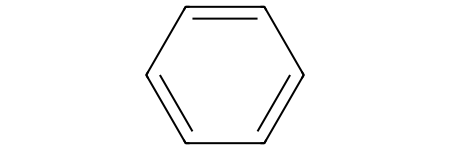

In [3]:
m = Chem.MolFromSmiles('c1ccccc1')
m

In [4]:
img = Draw.MolToFile(m, 'benzene.png')

### 2. save molecules with labels (e.g., SMILES, ID, SMILES & ID)

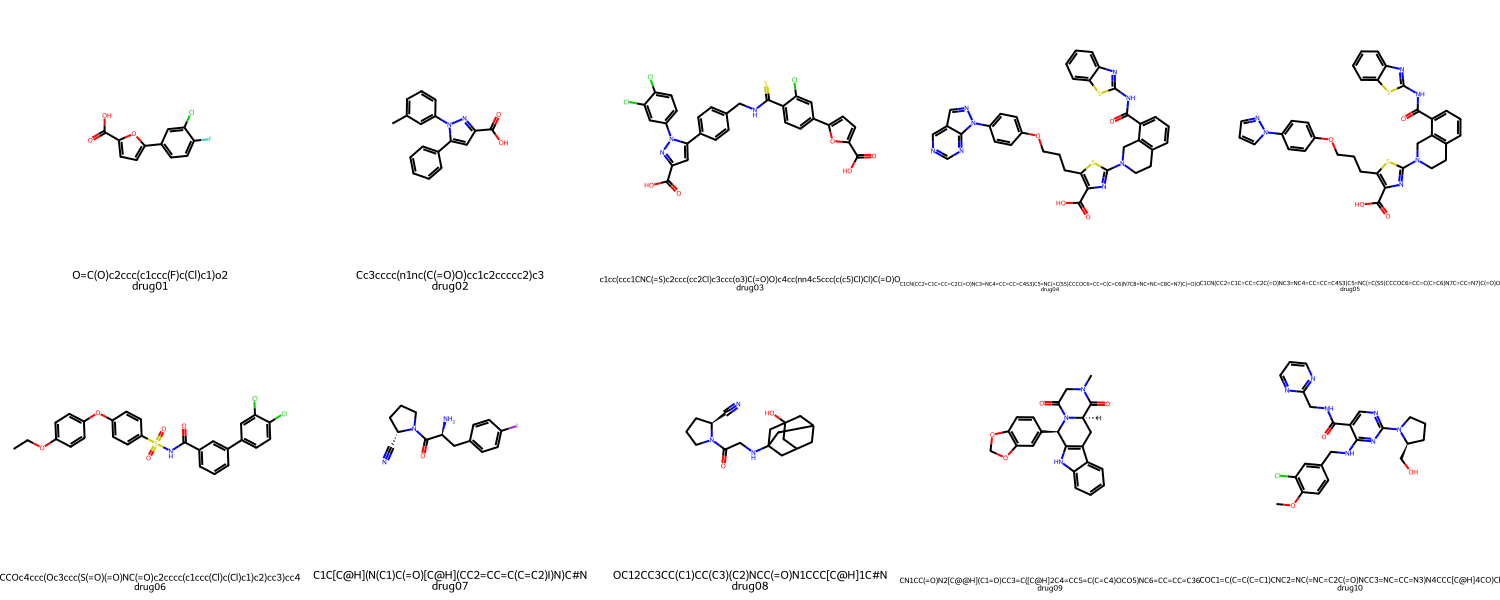

In [3]:
# make SMILES list
smi_list = [
    'O=C(O)c2ccc(c1ccc(F)c(Cl)c1)o2',
    'Cc3cccc(n1nc(C(=O)O)cc1c2ccccc2)c3',
    'c1cc(ccc1CNC(=S)c2ccc(cc2Cl)c3ccc(o3)C(=O)O)c4cc(nn4c5ccc(c(c5)Cl)Cl)C(=O)O',
    'C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=NC(=C(S5)CCCOC6=CC=C(C=C6)N7C8=NC=NC=C8C=N7)C(=O)O',
    'C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=NC(=C(S5)CCCOC6=CC=C(C=C6)N7C=CC=N7)C(=O)O',
    'CCOc4ccc(Oc3ccc(S(=O)(=O)NC(=O)c2cccc(c1ccc(Cl)c(Cl)c1)c2)cc3)cc4',
    'C1C[C@H](N(C1)C(=O)[C@H](CC2=CC=C(C=C2)I)N)C#N',
    'OC12CC3CC(C1)CC(C3)(C2)NCC(=O)N1CCC[C@H]1C#N',
    'CN1CC(=O)N2[C@@H](C1=O)CC3=C([C@H]2C4=CC5=C(C=C4)OCO5)NC6=CC=CC=C36',
    'COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=NC=CC=N3)N4CCC[C@H]4CO)Cl'
]

# make id list
id_list = [
    'drug01',
    'drug02',
    'drug03',
    'drug04',
    'drug05',
    'drug06',
    'drug07',
    'drug08',
    'drug09',
    'drug10',
]

# sum SMILES + id 
labelList = [smi +'\n'+ id for smi,id in zip(smi_list,id_list)]

# make mol list
mol = [Chem.MolFromSmiles(smi) for smi in smi_list]

# save img
#img = Draw.MolsToGridImage(mol, legends=smi_list, molsPerRow=4, subImgSize=(300,300) ,returnPNG=False)
#img.save('ojt_smi.png') # Draw.MolsToGridImage()의 옵션에서 returnPNG=False 로 설정해야함.

#img = Draw.MolsToGridImage(mol, legends=id_list, molsPerRow=4, subImgSize=(300,300) ,returnPNG=False)
#img.save('ojt_id.png') # Draw.MolsToGrcsv_pathidImage()의 옵션에서 returnPNG=False 로 설정해야함.PandasTools.WriteSDF(drugs, 'ojt.sdf', molColName='Molecule', properties=list(drugs.columns))

img = Draw.MolsToGridImage(mol, legends=labelList, molsPerRow=5, subImgSize=(300,300) ,returnPNG=False)
#img.save('ojt_smi_id.png') # Draw.MolsToGridImage()의 옵션에서 returnPNG=False 로 설정해야함.
img

### 3. make dataframes with id, SMILES, descriptors
- from rdkit.Chem import rdMolDescriptors
- from rdkit.Chem import PandasTools

In [13]:
# make SMILES list
smi_list = [
    'O=C(O)c2ccc(c1ccc(F)c(Cl)c1)o2',
    'Cc3cccc(n1nc(C(=O)O)cc1c2ccccc2)c3',
    'c1cc(ccc1CNC(=S)c2ccc(cc2Cl)c3ccc(o3)C(=O)O)c4cc(nn4c5ccc(c(c5)Cl)Cl)C(=O)O',
    'C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=NC(=C(S5)CCCOC6=CC=C(C=C6)N7C8=NC=NC=C8C=N7)C(=O)O',
    'C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=NC(=C(S5)CCCOC6=CC=C(C=C6)N7C=CC=N7)C(=O)O',
    'CCOc4ccc(Oc3ccc(S(=O)(=O)NC(=O)c2cccc(c1ccc(Cl)c(Cl)c1)c2)cc3)cc4',
    'C1C[C@H](N(C1)C(=O)[C@H](CC2=CC=C(C=C2)I)N)C#N',
    'OC12CC3CC(C1)CC(C3)(C2)NCC(=O)N1CCC[C@H]1C#N',
    'CN1CC(=O)N2[C@@H](C1=O)CC3=C([C@H]2C4=CC5=C(C=C4)OCO5)NC6=CC=CC=C36',
    'COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=NC=CC=N3)N4CCC[C@H]4CO)Cl'
]

# make id list
id_list = [
    'drug01',
    'drug02',
    'drug03',
    'drug04',
    'drug05',
    'drug06',
    'drug07',
    'drug08',
    'drug09',
    'drug10',
]


In [22]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools
import pandas as pd

def Drugs ():
    smi_path = 'smi_list'
    with open (smi_path, 'r') as f:
        smis = f.readlines()
        with open("ojt.csv", 'w') as file: # path + "_0626_final.csv" 을 열고 file로 이름대체
            file.write("Id,SMILES,Formula,MW,cLogP,MR,HBA,HBD,NASC,NRBO\n") 
            for smi in smis :
                DrugId, SMILES = smi.replace('\n','').replace('"','').replace('"','').split(',')
                # MolDescriptor
                Formula = rdMolDescriptors.CalcMolFormula(Chem.MolFromSmiles(SMILES)) # Chemical Formula
                MW = rdMolDescriptors.CalcExactMolWt(Chem.MolFromSmiles(SMILES)) # Molecular Weight
                clogP, mr = rdMolDescriptors.CalcCrippenDescriptors(Chem.MolFromSmiles(SMILES)) # mr: molar refractivity
                HBA = rdMolDescriptors.CalcNumLipinskiHBA(Chem.MolFromSmiles(SMILES)) # Number of Hbond Acceptors
                HBD = rdMolDescriptors.CalcNumLipinskiHBD(Chem.MolFromSmiles(SMILES)) # Number of Hbond Donors
                NASC = rdMolDescriptors.CalcNumAtomStereoCenters(Chem.MolFromSmiles(SMILES)) # Number of Atom StereoCenters
                NRBO = rdMolDescriptors.CalcNumRotatableBonds(Chem.MolFromSmiles(SMILES)) # Number of Rotatable Bonds
                file.write(f'{DrugId},{SMILES},{Formula},{MW},{clogP},{mr},{HBA},{HBD},{NASC},{NRBO}\n') 
    return pd.read_csv('ojt.csv')


drugs = Drugs ()
drugs
# # add molecule to frame
# PandasTools.AddMoleculeColumnToFrame(drugs, 'SMILES', 'Molecule', includeFingerprints=True)
# # print([str(x) for x in drugs.columns])

# # save sdf files of smiles in dataframe
# PandasTools.WriteSDF(drugs, 'ojt.sdf', molColName='Molecule', properties=list(drugs.columns))

# # save dataframe
# PandasTools.SaveXlsxFromFrame(drugs,'ojt.xls', molCol='Molecule')

,Id,SMILES,Formula,MW,cLogP,MR,HBA,HBD,NASC,NRBO
0,drug01,O=C(O)c2ccc(c1ccc(F)c(Cl)c1)o2,C11H6ClFO3,239.998950,3.43730,56.0713,3,1,0,2
1,drug02,Cc3cccc(n1nc(C(=O)O)cc1c2ccccc2)c3,C17H14N2O2,278.105528,3.54592,80.6963,4,1,0,3
2,drug03,c1cc(ccc1CNC(=S)c2ccc(cc2Cl)c3ccc(o3)C(=O)O)c4...,C29H18Cl3N3O5S,625.003275,7.62120,160.6323,8,3,0,8
3,drug04,C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=N...,C35H28N8O4S2,688.167493,6.40650,188.3185,12,2,0,10
4,drug05,C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=N...,C33H28N6O4S2,636.161345,6.46330,175.2225,10,2,0,10
5,drug06,CCOc4ccc(Oc3ccc(S(=O)(=O)NC(=O)c2cccc(c1ccc(Cl...,C27H21Cl2NO5S,541.051749,6.97010,140.6770,6,1,0,8
6,drug07,C1C[C@H](N(C1)C(=O)[C@H](CC2=CC=C(C=C2)I)N)C#N,C14H16IN3O,369.033810,1.67558,81.1864,4,2,2,3
7,drug08,OC12CC3CC(C1)CC(C3)(C2)NCC(=O)N1CCC[C@H]1C#N,C17H25N3O2,303.194677,1.17428,80.7135,5,2,3,3
8,drug09,CN1CC(=O)N2[C@@H](C1=O)CC3=C([C@H]2C4=CC5=C(C=...,C22H19N3O4,389.137556,2.21130,104.6817,7,1,2,1
9,drug10,COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=NC=CC=...,C23H26ClN7O3,483.178565,2.43180,128.0187,10,3,1,9


In [ ]:
!jupyter nbconvert --to html rdkit.ipynb

# 내가 만든 함수 활용

In [1]:
import sys
sys.path.append('/home/bjw0118/Desktop/bjw/jw_create/')

import pandas as pd
from jw_functions import SmiToDesciptor, MakeSDF, MakeDesWithPic

In [2]:
smi_list = [
    'O=C(O)c2ccc(c1ccc(F)c(Cl)c1)o2',
    'Cc3cccc(n1nc(C(=O)O)cc1c2ccccc2)c3',
    'c1cc(ccc1CNC(=S)c2ccc(cc2Cl)c3ccc(o3)C(=O)O)c4cc(nn4c5ccc(c(c5)Cl)Cl)C(=O)O',
    'C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=NC(=C(S5)CCCOC6=CC=C(C=C6)N7C8=NC=NC=C8C=N7)C(=O)O',
    'C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=NC(=C(S5)CCCOC6=CC=C(C=C6)N7C=CC=N7)C(=O)O',
    'CCOc4ccc(Oc3ccc(S(=O)(=O)NC(=O)c2cccc(c1ccc(Cl)c(Cl)c1)c2)cc3)cc4',
    'C1C[C@H](N(C1)C(=O)[C@H](CC2=CC=C(C=C2)I)N)C#N',
    'OC12CC3CC(C1)CC(C3)(C2)NCC(=O)N1CCC[C@H]1C#N',
    'CN1CC(=O)N2[C@@H](C1=O)CC3=C([C@H]2C4=CC5=C(C=C4)OCO5)NC6=CC=CC=C36',
    'COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=NC=CC=N3)N4CCC[C@H]4CO)Cl'
]

id_list = [
    'drug01',
    'drug02',
    'drug03',
    'drug04',
    'drug05',
    'drug06',
    'drug07',
    'drug08',
    'drug09',
    'drug10',
]

In [3]:
df = pd.DataFrame({'id': id_list,
                   'smiles': smi_list})

df.to_csv('smi.csv')

In [4]:
csv = 'smi.csv'
output = 'smi_descriptor.csv'

drugs = SmiToDesciptor(csv, output, clid='id', cisosmi='smiles')

csv = 'smi_descriptor.csv'
sdf = 'smi.sdf'
xls = 'smi.xls'

MakeSDF(csv_path=csv, output=sdf)
MakeDesWithPic(csv_path=csv, output=xls)


,ZINC_id,Isomeric_SMILES,Formula,MW,cLogP,MR,HBA,HBD,NASC,NRBO
0,drug01,O=C(O)c2ccc(c1ccc(F)c(Cl)c1)o2,C11H6ClFO3,239.998950,3.43730,56.0713,3,1,0,2
1,drug02,Cc3cccc(n1nc(C(=O)O)cc1c2ccccc2)c3,C17H14N2O2,278.105528,3.54592,80.6963,4,1,0,3
2,drug03,c1cc(ccc1CNC(=S)c2ccc(cc2Cl)c3ccc(o3)C(=O)O)c4...,C29H18Cl3N3O5S,625.003275,7.62120,160.6323,8,3,0,8
3,drug04,C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=N...,C35H28N8O4S2,688.167493,6.40650,188.3185,12,2,0,10
4,drug05,C1CN(CC2=C1C=CC=C2C(=O)NC3=NC4=CC=CC=C4S3)C5=N...,C33H28N6O4S2,636.161345,6.46330,175.2225,10,2,0,10
5,drug06,CCOc4ccc(Oc3ccc(S(=O)(=O)NC(=O)c2cccc(c1ccc(Cl...,C27H21Cl2NO5S,541.051749,6.97010,140.6770,6,1,0,8
6,drug07,C1C[C@H](N(C1)C(=O)[C@H](CC2=CC=C(C=C2)I)N)C#N,C14H16IN3O,369.033810,1.67558,81.1864,4,2,2,3
7,drug08,OC12CC3CC(C1)CC(C3)(C2)NCC(=O)N1CCC[C@H]1C#N,C17H25N3O2,303.194677,1.17428,80.7135,5,2,3,3
8,drug09,CN1CC(=O)N2[C@@H](C1=O)CC3=C([C@H]2C4=CC5=C(C=...,C22H19N3O4,389.137556,2.21130,104.6817,7,1,2,1
9,drug10,COC1=C(C=C(C=C1)CNC2=NC(=NC=C2C(=O)NCC3=NC=CC=...,C23H26ClN7O3,483.178565,2.43180,128.0187,10,3,1,9
